# Indicadores da GGTOX

ESTE PROGRAMA IDENTIFICA O NÚMERO DE EXPEDIENTES TRAMITADOS POR SITUAÇÃO PARA A GGTOX 
PARA MEDIR A QUANTIDADE DE TRABALHO DEMANDADO, PRODUTIVIDADE DA ÁREA 
NUMERO DE ENTRADAS E FINALIZAÇÕES DE EXPEDIENTES POR ANO E MES 
ANALISA O TEMPO MÉDIO DE ANÁLISE DOS PROCESSOS CONSIDERANDO AS EXIGÊNCIAS FEITAS E O TEMPO DE FILA PARA ANÁLISE 

FONTES: 
1. RELATÓRIO SITUAÇÕES DE EXPEDIENTES DO DATAVISA-DV (SQLSERVER)
2. TABELA 'DE PARA' CÓDIGOS DE ASSUNTOS - 
3. TABELA 'DE PARA' SITUAÇÃO DOS PROCESSOS 
4. CRITÉRIOS PARA FILA
 
SAIDA: ARQUIVOS TXT PARA MONTAR A PUBLICAÇÃO NO SEI
 
Versões - Atualizações

1. Criado em 13/02/2023 




Comparando SAS x Panda https://pandas.pydata.org/docs/getting_started/comparison/comparison_with_sas.html

Leitura panda https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html #https://stackoverflow.com/questions/37395881/pandas-read-in-txt-file-without-headers
 


In [1]:
#pip install pyodbc
# importar bibliotecas
import pandas as pd
import numpy as np
import io

# 2. MODELANDO

In [123]:
df_0   = pd.read_excel(r'C:\Users\alesa\OneDrive - ANVISA - Agencia Nacional de Vigilancia Sanitaria\000_ECD\TCC\Dados\df.xlsx',
                         header=0, sheet_name="Planilha1")

df_0 = pd.DataFrame(df_0[(df_0['CO_ASSUNTO'] == 5002)]) 

df_0['DATA_FINALIZACAO'] = df_0['DT_FINALIZACAO'].dt.date
df_0['DATA_FINALIZACAO_AM'] = df_0['DT_FINALIZACAO'].dt.strftime('%Y-%m')

#df = df_0.groupby(['CO_ASSUNTO','CO_ASSUNTO_T','DATA_FINALIZACAO'])['TOTAL'].mean().reset_index()
df = df_0.groupby(['CO_ASSUNTO','CO_ASSUNTO_T','DATA_FINALIZACAO_AM'])['TOTAL'].mean().reset_index()
df.head()


,CO_ASSUNTO,CO_ASSUNTO_T,DATA_FINALIZACAO_AM,TOTAL
0,5002,5002,2005-07,495.333333
1,5002,5002,2005-08,319.625000
2,5002,5002,2005-09,581.800000
3,5002,5002,2005-12,87.000000
4,5002,5002,2006-02,456.000000


In [98]:
df_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2303 entries, 71 to 21930
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CO_ASSUNTO           2303 non-null   int64         
 1   NU_EXPEDIENTE        2303 non-null   int64         
 2   RECURSO              2303 non-null   int64         
 3   CANCELADO            2303 non-null   int64         
 4   DT_ENTRADA           2303 non-null   datetime64[ns]
 5   DT_FINALIZACAO       2303 non-null   datetime64[ns]
 6   ANALISE              995 non-null    float64       
 7   TOTAL                2303 non-null   int64         
 8   CO_ASSUNTO_T         2303 non-null   int64         
 9   DATA_FINALIZACAO     2303 non-null   object        
 10  DATA_FINALIZACAO_AM  2303 non-null   object        
dtypes: datetime64[ns](2), float64(1), int64(6), object(2)
memory usage: 215.9+ KB


## MODELO ARIMA

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

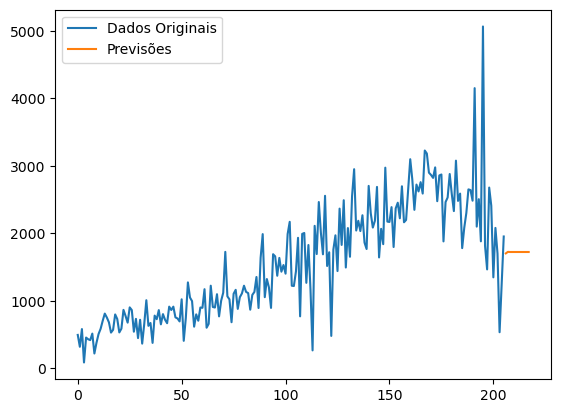

In [43]:

# Definir os parâmetros do modelo ARIMA
order = (1, 1, 1)  # Ordem do modelo ARIMA (p, d, q)

# Ajustar o modelo ARIMA aos dados
model = ARIMA(df['TOTAL'], order=order)
model_fit = model.fit()

# Fazer previsões
n_steps = 12  # Número de passos futuros a serem previstos
forecast = model_fit.forecast(steps=n_steps)

# Plotar os dados originais e as previsões
plt.plot(df['TOTAL'], label='Dados Originais')
plt.plot(np.arange(len(df['TOTAL']), len(df['TOTAL']) + n_steps), forecast, label='Previsões')
plt.legend()
plt.show()


In [100]:
forecast

206    1702.376662
207    1724.992891
208    1722.949966
209    1723.134504
210    1723.117834
211    1723.119340
212    1723.119204
213    1723.119216
214    1723.119215
215    1723.119215
216    1723.119215
217    1723.119215
Name: predicted_mean, dtype: float64

In [44]:
# Para calcular o Mean Squared Error (MSE) em um modelo ARIMA

# Separar os dados em treinamento e teste
train_data = df.iloc[:-2]
test_data = df.iloc[-2:]

order = (1, 1, 1)  # Ordem do modelo ARIMA (p, d, q)

# Ajustar o modelo ARIMA aos dados
model = ARIMA(df['TOTAL'], order=order)
model_fit = model.fit()



# Fazer as previsões para os dados de teste
predictions = model_fit.predict(start=test_data.index[0], end=test_data.index[-1])

# Calcular o MSE
mse = np.mean((predictions - test_data['TOTAL']) ** 2)

print('Mean Squared Error (MSE):', mse)

Mean Squared Error (MSE): 270125.729013685


In [122]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Carregar os dados de vendas por tipo de produto
data = df

data = data.rename(columns={'CO_ASSUNTO_T': 'tipo_produto','DATA_FINALIZACAO_AM': 'data','TOTAL': 'vendas'})

# Definir a lista de tipos de produtos únicos
tipos_produto = data['tipo_produto'].unique()

# Criar um dicionário para armazenar as previsões por tipo de produto
previsoes = {}

# Iterar sobre cada tipo de produto e ajustar um modelo ARIMA
for tipo_produto in tipos_produto:
    # Filtrar os dados apenas para o tipo de produto atual
    dados_produto = data[data['tipo_produto'] == tipo_produto]
    
    # Converter a coluna de datas para o tipo correto (se necessário)
    dados_produto['data'] = pd.to_datetime(dados_produto['data'])
    
    # Definir a coluna de datas como o índice do DataFrame
    dados_produto.set_index('data', inplace=True)
    
    # Ajustar um modelo ARIMA aos dados de vendas
    modelo = ARIMA(dados_produto['vendas'], order=(1, 0, 0))  # Exemplo: ARIMA(1, 0, 0)
    modelo_treinado = modelo.fit()
    
    # Gerar previsões para um período futuro
    previsao = modelo_treinado.predict(start=len(dados_produto), end=len(dados_produto)+12-1)  # n é o número de períodos de previsão desejado
    
    # Armazenar as previsões para o tipo de produto atual
    previsoes[tipo_produto] = previsao

# Exibir as previsões por tipo de produto
for tipo_produto, previsao in previsoes.items():
    print(f"Previsões para o tipo de produto {tipo_produto}:")
    print(previsao)
    print("\n")


ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 1 dimension(s) and the array at index 1 has 2 dimension(s)

## Modelagem

### Random Forest

In [48]:
#carregar bibliotecas para a modelagem
#from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error

In [49]:
# Modelo Random forest de Previsão
x = pd.DataFrame(df[['CO_ASSUNTO_T',
                     #'DT_ENTRADA',
                     #'DT_FINALIZACAO'
                    ]])
y = df['TOTAL']

#Particionar base de dados
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Definir parâmetros do modelo
#modelo = RandomForestClassifier(n_estimators=100, random_state=0)
modelo = RandomForestRegressor()
#Ajustar o modelo
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mse
# total 651325.3324850077
1085455.8111931058

1085455.8111931058

In [51]:
#Realizar a previsão do modelo

X = pd.DataFrame(df[['CO_ASSUNTO_T',
                     #'RECURSO',
                     #'CANCELADO',
                     #'DT_ENTRADA',
                     #'DT_FINALIZACAO'
                    ]])
y = df['TOTAL']


# Crie uma instância do modelo Random Forest e ajuste-o aos dados
rf = RandomForestRegressor()
rf.fit(X, y)

# Faça as previsões usando o modelo treinado
y_pred = rf.predict(X)

# Adicione as previsões ao DataFrame original
df['y_pred'] = y_pred

# Exiba o DataFrame com as previsões
df.head()


,CO_ASSUNTO_T,DATA_FINALIZACAO_AM,TOTAL,y_pred
0,5002,2005-07,495.333333,1554.023514
1,5002,2005-08,319.625000,1554.023514
2,5002,2005-09,581.800000,1554.023514
3,5002,2005-12,87.000000,1554.023514
4,5002,2006-02,456.000000,1554.023514


### Arvore de Decisão


In [52]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [53]:
# Modelo Random forest de Previsão
x = pd.DataFrame(df[['CO_ASSUNTO_T',
                     #'RECURSO',
                     #'CANCELADO',
                     #'DT_ENTRADA',
                     #'DT_FINALIZACAO'
                    ]])
y = df['TOTAL']

#Particionar base de dados
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Definir parâmetros do modelo
#modelo = RandomForestClassifier(n_estimators=100, random_state=0)
dt = DecisionTreeRegressor()
#Ajustar o modelo
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mse

#A interpretação do MSE é que ele mede a média dos erros ao quadrado, portanto, 
#quanto menor o valor do MSE, melhor é o ajuste do modelo aos dados. 
#Um MSE igual a zero indica que o modelo é capaz de fazer previsões perfeitas, 
#correspondendo exatamente aos valores reais.

#total 652522.7518934308

697176.4896198811

### Modelo de Regressão paramétrica




In [58]:
import statsmodels.api as sm

In [59]:
# Modelo Random forest de Previsão
X = pd.DataFrame(df[['CO_ASSUNTO',
                     #'RECURSO',
                     #'CANCELADO',
                     #'DT_ENTRADA',
                     #'DT_FINALIZACAO'
                    ]])
y = df['TOTAL']

# Adicione uma coluna constante para o termo de interceptação
X = sm.add_constant(X)

# Crie o modelo de regressão linear
model = sm.OLS(y, X)

# Ajuste o modelo aos dados
results = model.fit()

# Imprima os resultados da regressão
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  TOTAL   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 27 Jun 2023   Prob (F-statistic):                nan
Time:                        15:56:08   Log-Likelihood:                -1682.8
No. Observations:                 206   AIC:                             3368.
Df Residuals:                     205   BIC:                             3371.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CO_ASSUNTO     0.3096      0.012     25.963      0.0

### Modelo de Redes Neurais


In [60]:
#!pip install tensorflow
# uma biblioteca poderosa e abrangente para o desenvolvimento de modelos de aprendizado de máquina e redes neurais.

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler


In [61]:
# Carregando os dados de exemplo (série temporal)
data = df

# Pré-processamento dos dados
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data['TOTAL'].values.reshape(-1, 1))

# Divisão dos dados em treinamento e teste
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]


# Função para criar o conjunto de dados de entrada e saída
def create_dataset(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps])
        y.append(data[i+time_steps])
    return np.array(X), np.array(y)


In [62]:
# Definição do número de passos de tempo e criação dos conjuntos de treinamento e teste
time_steps = 10
X_train, y_train = create_dataset(train_data, time_steps)
X_test, y_test = create_dataset(test_data, time_steps)

# Construção do modelo de redes neurais
model = Sequential()
model.add(LSTM(32, activation='relu', input_shape=(time_steps, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Treinamento do modelo
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Previsão com o modelo treinado
y_pred = model.predict(X_test)

# Inversão da escala dos dados previstos
y_pred = scaler.inverse_transform(y_pred)

# Avaliação do desempenho do modelo (por exemplo, MSE)
mse = np.mean((y_test - y_pred)**2)
print(f'MSE: {mse}')
# MSE: 2968198.7207129532 - TOTAL




Epoch 1/10
5/5 [==============================] - 2s 8ms/step - loss: 0.0374
Epoch 2/10
5/5 [==============================] - 0s 6ms/step - loss: 0.0239
Epoch 3/10
5/5 [==============================] - 0s 6ms/step - loss: 0.0131
Epoch 4/10
5/5 [==============================] - 0s 6ms/step - loss: 0.0078
Epoch 5/10
5/5 [==============================] - 0s 5ms/step - loss: 0.0079
Epoch 6/10
5/5 [==============================] - 0s 6ms/step - loss: 0.0083
Epoch 7/10
5/5 [==============================] - 0s 6ms/step - loss: 0.0071
Epoch 8/10
5/5 [==============================] - 0s 6ms/step - loss: 0.0066
Epoch 9/10
5/5 [==============================] - 0s 6ms/step - loss: 0.0065
Epoch 10/10
1/1 [==============================] - 0s 223ms/step
MSE: 5137296.873267034


In [72]:
REDES NEURAIS


     -------------------------------------- 141.8/141.8 kB 1.4 MB/s eta 0:00:00
     -------------------------------------- 721.2/721.2 kB 4.1 MB/s eta 0:00:00
     ---------------------------------------- 22.0/22.0 MB 4.9 MB/s eta 0:00:00
     -------------------------------------- 519.2/519.2 kB 6.5 MB/s eta 0:00:00
     ---------------------------------------- 3.7/3.7 MB 3.6 MB/s eta 0:00:00
     ------------------------------------ 101.6/101.6 kB 982.4 kB/s eta 0:00:00
     ---------------------------------------- 15.5/15.5 MB 7.6 MB/s eta 0:00:00
     -------------------------------------- 323.6/323.6 kB 6.7 MB/s eta 0:00:00
     ---------------------------------------- 61.7/61.7 kB 3.2 MB/s eta 0:00:00
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.56.0
    Uninstalling grpcio-1.56.0:
      Successfully uninstalled grpcio-1.56.0
  Using cached neuralforecast-1.5.0-py3-none-any.whl (141 kB)
  Using cached pytorch_lightning-2.0.4-py3-none-any.whl (721 kB)


In [ ]:
#pip install torch torchvision
#!pip install neuralforecast

In [87]:
def wmape(y_true, y_pred):
    return np.abs(y_true - y_pred).sum() / np.abs(y_true).sum()

In [67]:
date: data do registro
family: categoria do produto
sales: número de vendas
onpromotion: a quantidade de produtos daquela categoria que estavam em promoção naquele dia
    
    

     -------------------------------------- 172.4/172.4 MB 1.1 MB/s eta 0:00:00
     ---------------------------------------- 1.2/1.2 MB 5.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [91]:
data2 = df.rename(columns={'DATA_FINALIZACAO': 'ds', 'TOTAL': 'y', 'CO_ASSUNTO_T': 'unique_id'})

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 945 entries, 0 to 944
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CO_ASSUNTO        945 non-null    int64  
 1   CO_ASSUNTO_T      945 non-null    int64  
 2   DATA_FINALIZACAO  945 non-null    object 
 3   TOTAL             945 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 29.7+ KB


In [95]:
train = data2.loc[data2['ds'] <= '2021-01-01']
valid = data2.loc[(data2['ds'] >= '2021-01-01') & (data2['ds'] <= '2021-01-01')]
h = valid['ds'].nunique()

TypeError: '<=' not supported between instances of 'datetime.date' and 'str'

In [85]:
valid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CO_ASSUNTO  0 non-null      int64  
 1   unique_id   0 non-null      int64  
 2   ds          0 non-null      object 
 3   y           0 non-null      float64
dtypes: float64(1), int64(2), object(1)
memory usage: 0.0+ bytes


In [88]:
from neuralforecast import NeuralForecast
from neuralforecast.auto import AutoLSTM

models = [AutoLSTM(h=h, 
                   num_samples=30, 
                   loss=wmape())]

model = NeuralForecast(models=models, freq='M')

TypeError: wmape() missing 2 required positional arguments: 'y_true' and 'y_pred'

In [89]:
model.fit(train, val_size=30)

p = model.predict().reset_index()
p = p.merge(valid[['ds','unique_id', 'y']], on=['ds', 'unique_id'], how='left')
print(wmape(p['y'], p['AutoLSTM']))

TypeError: fit() got an unexpected keyword argument 'val_size'